# Percentile Method

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('csv/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\moury\AppData\Local\Temp\ipykernel_7012\2650706058.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
C:\Users\moury\AppData\Local\Temp\ipykernel_7012\2650706058.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


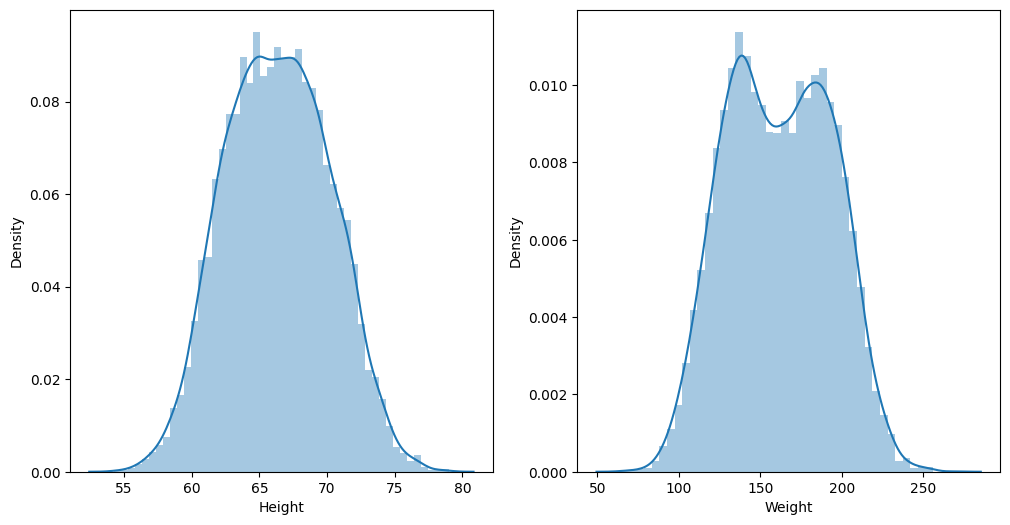

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(df['Height'])
plt.subplot(122)
sns.distplot(df['Weight'])
plt.show()

In [6]:
upper_limit,lower_limit=df['Height'].quantile(0.99),df['Height'].quantile(0.01)
upper_limit,lower_limit

(np.float64(74.7857900583366), np.float64(58.13441158671655))

## Trimming

In [11]:
new_df=df[(df['Height']<=upper_limit) & (df['Height']>=lower_limit)]
new_df.shape

(9800, 3)

In [12]:
new_df.describe()

,Height,Weight
count,9800.000000,9800.000000
mean,66.364366,161.399489
std,3.645075,30.933549
min,58.134496,77.523774
25%,63.577162,136.322717
50%,66.318070,161.212928
75%,69.119896,186.753317
max,74.785714,249.946283


C:\Users\moury\AppData\Local\Temp\ipykernel_7012\1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

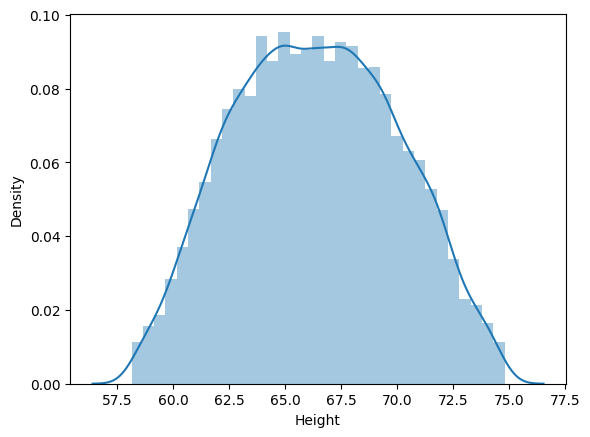

In [13]:
sns.distplot(new_df['Height'])

## Capping - Winziration

In [14]:
new_data=df.copy()

In [15]:
new_data['Height']=np.where(
    new_data['Height']>=upper_limit,
    upper_limit,
    np.where(
        new_data['Height']<=lower_limit,
        lower_limit,
        new_data['Height']
    )
)

In [16]:
new_data.describe(),df.describe()

(             Height        Weight
 count  10000.000000  10000.000000
 mean      66.366281    161.440357
 std        3.795717     32.108439
 min       58.134412     64.700127
 25%       63.505620    135.818051
 50%       66.318070    161.212928
 75%       69.174262    187.169525
 max       74.785790    269.989699,
              Height        Weight
 count  10000.000000  10000.000000
 mean      66.367560    161.440357
 std        3.847528     32.108439
 min       54.263133     64.700127
 25%       63.505620    135.818051
 50%       66.318070    161.212928
 75%       69.174262    187.169525
 max       78.998742    269.989699)

C:\Users\moury\AppData\Local\Temp\ipykernel_7012\3552755096.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
C:\Users\moury\AppData\Local\Temp\ipykernel_7012\3552755096.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])
C:\Users\moury\AppData\Local\Temp\ipyker

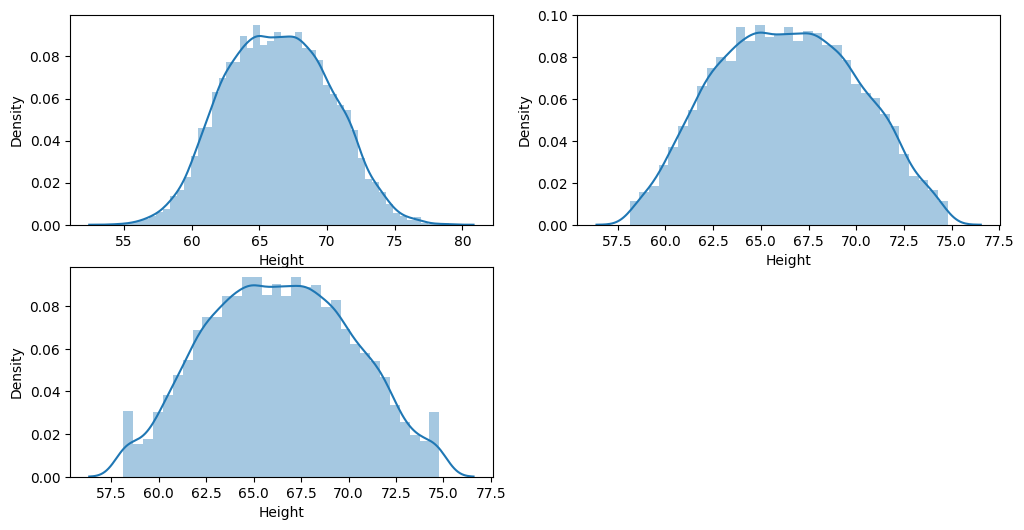

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(221)
sns.distplot(df['Height'])
plt.subplot(222)
sns.distplot(new_df['Height'])
plt.subplot(223)
sns.distplot(new_data['Height'])
plt.show()